In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats 
import pingouin
from bioinfokit.analys import stat
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\lily\Desktop\Random codes\Kaggle\Hypothesis testing\Glassdoor Gender Pay Gap.csv")

In [3]:
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [4]:
df.shape

(1000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [7]:
df.drop_duplicates()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [8]:
df['TotalPay'] = df['BasePay'] + df['Bonus']

In [9]:
df['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [10]:
df['Education'].unique()

array(['College', 'PhD', 'Masters', 'High School'], dtype=object)

In [11]:
df['Dept'].unique()

array(['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'], dtype=object)

In [12]:
average_pay = df.groupby('JobTitle')['TotalPay'].mean()\
.reset_index()\
.rename(columns = {'TotalPay': 'Average salary per job'})\
.sort_values(by='Average salary per job', ascending=False)\
.reset_index(drop=True)

In [13]:
average_pay 

,JobTitle,Average salary per job
0,Manager,131392.177778
1,Software Engineer,112161.412844
2,Financial Analyst,101403.626168
3,Sales Associate,99670.787234
4,Data Scientist,98918.411215
5,Graphic Designer,97674.530612
6,IT,97030.395833
7,Warehouse Associate,96798.444444
8,Driver,95778.890110
9,Marketing Associate,82802.127119


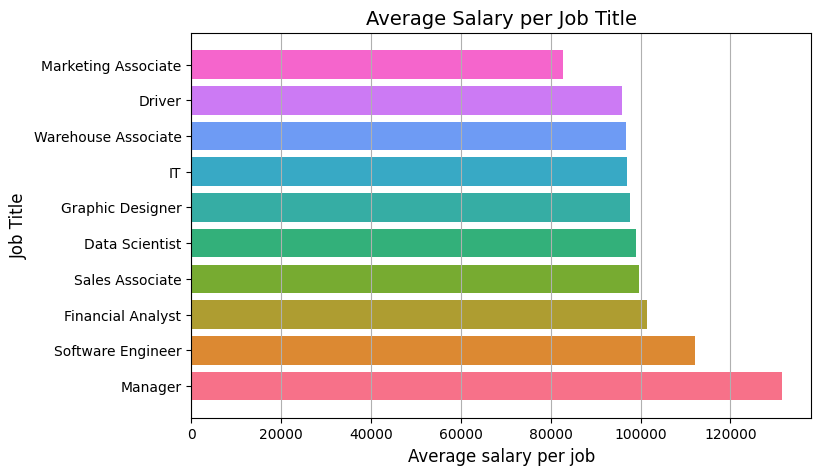

In [14]:
palette = sns.color_palette("husl", len(average_pay))

plt.figure(figsize=(8, 5))
plt.barh(average_pay['JobTitle'], average_pay['Average salary per job'], color=palette)


plt.xlabel('Average salary per job', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.title('Average Salary per Job Title', fontsize=14)
plt.grid(axis='x')

plt.show()

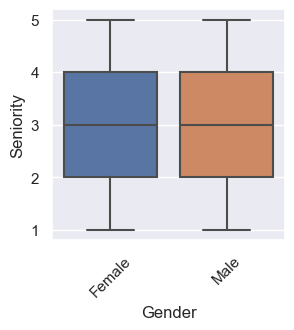

In [15]:
sns.set(rc={"figure.figsize":(3,3)})
sns.boxplot(x='Gender', y='Seniority', data = df )
plt.xticks(rotation=45)
plt.show()

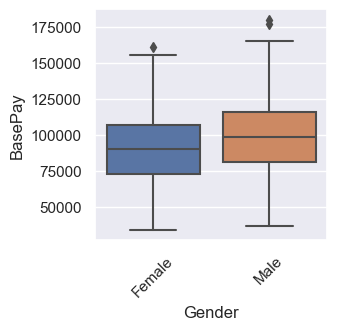

In [16]:
sns.boxplot(x='Gender', y='BasePay', data = df )
plt.xticks(rotation=45)
plt.show()

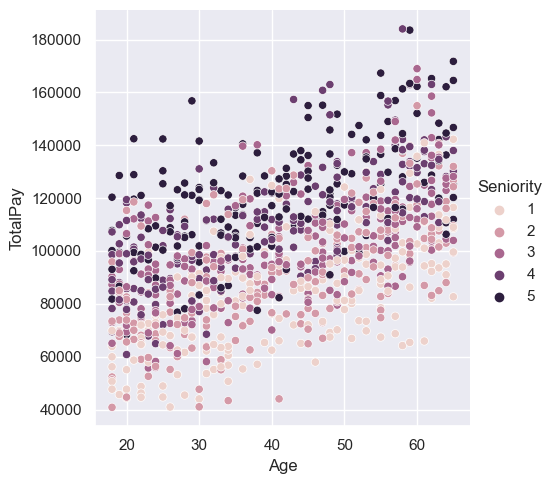

In [17]:
sns.relplot(x='Age', y = 'TotalPay', data = df, kind = 'scatter', hue = 'Seniority')
plt.show()

In [18]:
edu_order = ["High School", "College", "Masters", "PhD"]

C:\Users\lily\AppData\Local\Temp\ipykernel_6424\2353938151.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Education',


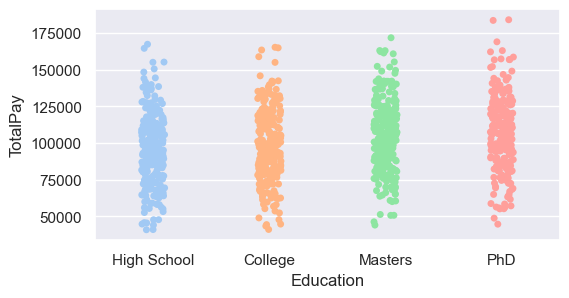

In [19]:
sns.set(rc={"figure.figsize":(6,3)}) 
sns.stripplot(x='Education',
              y = 'TotalPay',
              data = df,
              palette= 'pastel',
              order= edu_order)
plt.show()

**Checking for outliers**

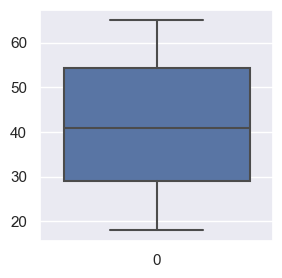

In [20]:
sns.set(rc={"figure.figsize":(3,3)}) 
sns.boxplot(data=df['Age'])
plt.show()

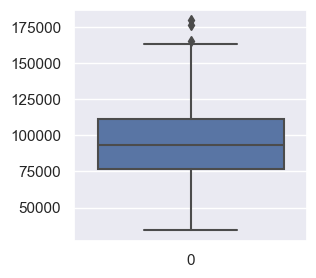

In [21]:
sns.boxplot(data=df['BasePay'])
plt.show()

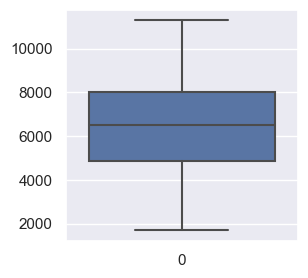

In [22]:
sns.boxplot(data=df['Bonus'])
plt.show()

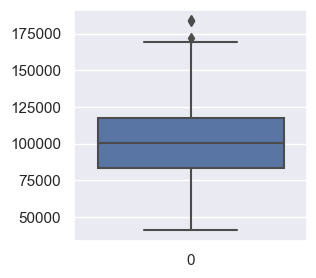

In [23]:
sns.boxplot(data=df['TotalPay'])
plt.show()

In [24]:
non_outlier_condition = (
(df['BasePay'] < df['BasePay'].quantile(0.98)) &
(df['BasePay'] > df['BasePay'].quantile(0.01))
)

In [25]:
df = df[non_outlier_condition]

In [26]:
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


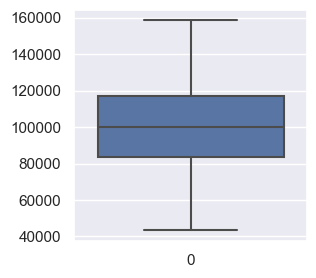

In [27]:
sns.boxplot(data=df['TotalPay'])
plt.show()

<AxesSubplot: xlabel='Gender', ylabel='TotalPay'>

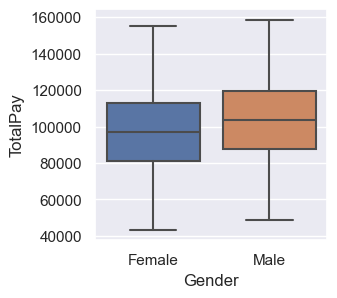

In [28]:
sns.set(rc={"figure.figsize":(3,3)})
sns.boxplot(data=df, x='Gender', y='TotalPay')

### Hypothesis testing for genders & salary
    H0: Men earns equally to women
    H1: Men earns more than women
    
   Independent two sampled t-test to be conducted

Assumptions:

     **Normality**
     **Equal variance**
     **No outliers**

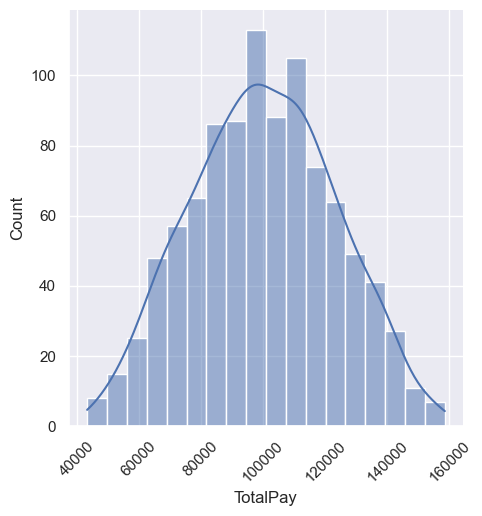

In [29]:
sns.displot(df['TotalPay'], kde=True)
plt.xticks(rotation=45)
plt.show()

Normally distributed --> Assumption OK!

<AxesSubplot: xlabel='Age', ylabel='Count'>

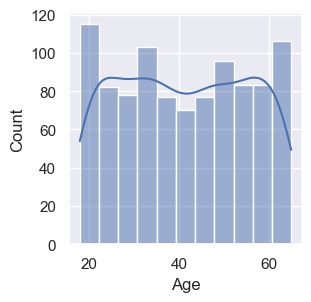

In [30]:
sns.histplot(df['Age'], kde=True)

Observation: Ages between range 20-65, less people in the age around 45. Ages shows bimodal distribution (no normal distribution) --> normality violated, data transformation needed

In [31]:
#sns.boxplot(df['TotalPay'])

In [32]:
male = df[df['Gender'] == 'Male']['TotalPay']

In [33]:
female = df[df['Gender'] == 'Female']['TotalPay']

In [34]:
len(male)

512

In [35]:
len(female)

458

In [36]:
np.var(male)

518591489.05440575

In [37]:
np.var(female)

527430761.83564407

In [38]:
np.var(male)/np.var(female)

0.9832408850206716

Observation :  Data is constant, assumption is not biased --> OK!

In [39]:
test_results = pingouin.ttest(x=male, 
                              y=female,
                              paired = False, 
                              alternative="greater")

In [40]:
test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.091088,954.218575,greater,0.000023,"[3600.32, inf]",0.263248,513.936,0.992764


In [41]:
t_statistic_1, p_value_1 = stats.ttest_ind(male, female, equal_var=False)  
print('t_statistic:',t_statistic_1)
print('p_value:',p_value_1)

t_statistic: 4.091088217792675
p_value: 4.6560816440454477e-05


#### P-value is under significance level as of 0.05, therefore H0 to be rejected, meaning men earns more than women.

### ANOVA testing for department & salary
    H0 : No difference between salaries of the departments.
    H1: There is significant difference between salaries of the departments.

In [42]:
pg_anova = pingouin.anova(dv='TotalPay', between='Dept', data=df,
            detailed=True)

In [43]:
pg_anova

,Source,SS,DF,MS,F,p-unc,np2
0,Dept,4.461782e+09,4,1.115445e+09,2.104835,0.078245,0.008649
1,Within,5.113963e+11,965,5.299444e+08,NaN,NaN,NaN


In [44]:
res = stat()
res.anova_stat(df=df, res_var='TotalPay', anova_model="TotalPay ~ C(Dept)")
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Dept),4.0,4.461782e+09,1.115445e+09,2.104835,0.078245
Residual,965.0,5.113963e+11,5.299444e+08,NaN,NaN


#### P-value (0.078245) is above significance level as of 0.05, therefore H0 fail to be rejected, meaning there is no significant difference between the salary of the departments.

<AxesSubplot: xlabel='Education', ylabel='BasePay'>

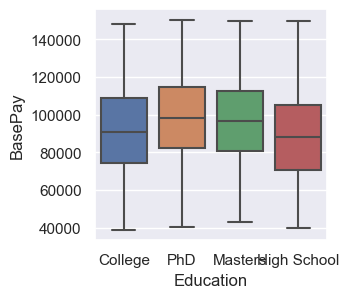

In [45]:
sns.boxplot(data=df, x='Education', y='BasePay')

### Chi square test for education & genders
    H0: There is no association between gender and education level among employees in the dataset.
    H1: There is an association between gender and education level among employees in the dataset.

In [46]:
tabulation = pd.crosstab(index=df['Education'], columns=df['Gender'])
tabulation

Gender,Female,Male
Education,,
College,122,112
High School,128,131
Masters,104,144
PhD,104,125


In [47]:
stats.chi2_contingency(tabulation)

Chi2ContingencyResult(statistic=5.8514254965104175, pvalue=0.11906673821849442, dof=3, expected_freq=array([[110.48659794, 123.51340206],
       [122.29072165, 136.70927835],
       [117.09690722, 130.90309278],
       [108.1257732 , 120.8742268 ]]))

#### P-value (0.119066) is above significance level as of 0.05, therefore H0 is fail to be rejected, meaning there is no significant relationship between gender and education level

### Regression with statsmodel.api

In [48]:
df2 = df.copy()

In [49]:
df2

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


In [50]:
df2.drop('JobTitle', axis=1, inplace=True)

In [51]:
df2 = pd.get_dummies(df2, columns=['Gender', 'Education', 'Dept'])

In [52]:
df2.columns

Index(['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus', 'TotalPay',
       'Gender_Female', 'Gender_Male', 'Education_College',
       'Education_High School', 'Education_Masters', 'Education_PhD',
       'Dept_Administration', 'Dept_Engineering', 'Dept_Management',
       'Dept_Operations', 'Dept_Sales'],
      dtype='object')

In [53]:
bool_columns = ['Gender_Female', 'Gender_Male', 'Education_College', 'Education_High School', 'Education_Masters', 'Education_PhD', 'Dept_Administration', 'Dept_Engineering', 'Dept_Management', 'Dept_Operations', 'Dept_Sales']

In [54]:
df2[bool_columns] = df2[bool_columns].astype(int)

In [55]:
df2

,Age,PerfEval,Seniority,BasePay,Bonus,TotalPay,Gender_Female,Gender_Male,Education_College,Education_High School,Education_Masters,Education_PhD,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,18,5,2,42363,9938,52301,1,0,1,0,0,0,0,0,0,1,0
1,21,5,5,108476,11128,119604,0,1,1,0,0,0,0,0,1,0,0
2,19,4,5,90208,9268,99476,1,0,0,0,0,1,1,0,0,0,0
3,20,5,4,108080,10154,118234,0,1,0,0,1,0,0,0,0,0,1
4,26,5,5,99464,9319,108783,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,61,1,1,62644,3270,65914,1,0,0,1,0,0,1,0,0,0,0
996,57,1,2,108977,3567,112544,0,1,0,0,1,0,0,0,0,0,1
997,48,1,1,92347,2724,95071,0,1,0,1,0,0,0,0,0,1,0
998,65,2,1,97376,2225,99601,0,1,0,1,0,0,1,0,0,0,0


Dropping basepay and bonus due to multicollinearity

In [56]:
X = df2.drop(['TotalPay', 'BasePay', 'Bonus'], axis=1) 
y = df2['TotalPay']

In [57]:
X = sm.add_constant(X)

In [58]:
model = sm.OLS(y, X).fit()

In [59]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          7.72e-191
Time:                        08:13:40   Log-Likelihood:                -10656.
No. Observations:                 970   AIC:                         2.134e+04
Df Residuals:                     958   BIC:                         2.139e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.73e+

In [60]:
df2.columns

Index(['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus', 'TotalPay',
       'Gender_Female', 'Gender_Male', 'Education_College',
       'Education_High School', 'Education_Masters', 'Education_PhD',
       'Dept_Administration', 'Dept_Engineering', 'Dept_Management',
       'Dept_Operations', 'Dept_Sales'],
      dtype='object')

***Checking for multicollinearity***

<AxesSubplot: >

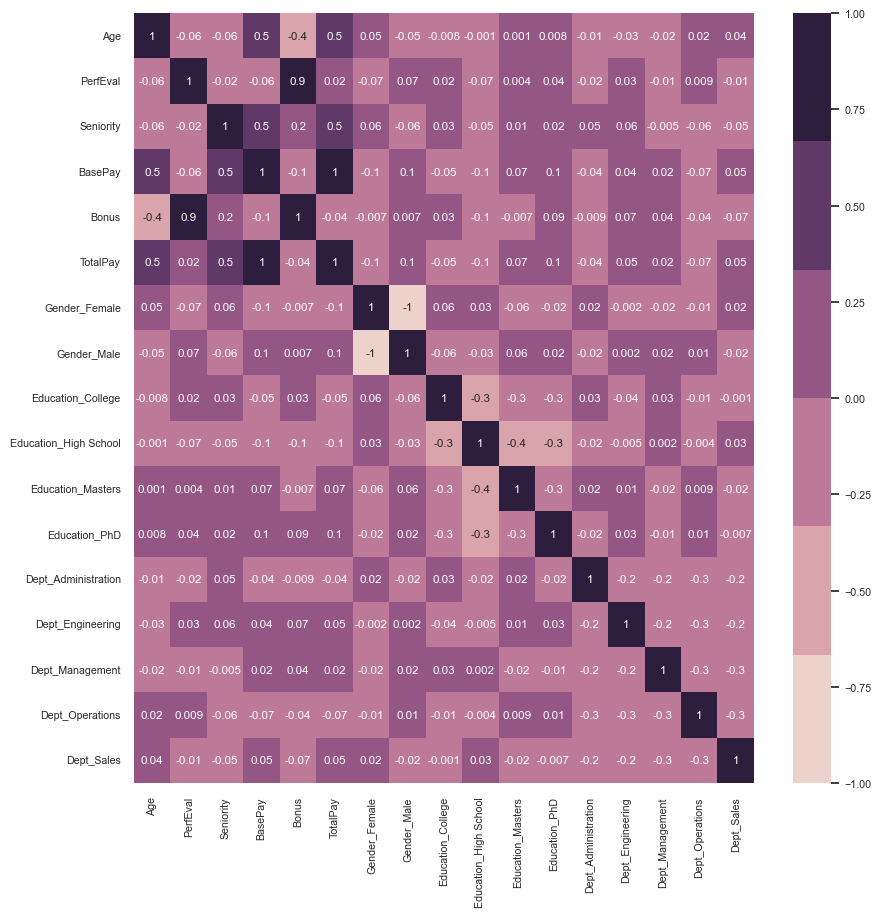

In [61]:
plt.figure(figsize = (10,10))
colormap = sns.cubehelix_palette()
sns.set(font_scale = 0.7)
sns.heatmap(df2.corr(), annot=True,fmt='.1g', cmap=colormap)


In [70]:
df2 = df2.rename(columns={'Education_High School': 'Education_High_School'})

In [71]:
df2.columns

Index(['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus', 'TotalPay',
       'Gender_Female', 'Gender_Male', 'Education_College',
       'Education_High_School', 'Education_Masters', 'Education_PhD',
       'Dept_Administration', 'Dept_Engineering', 'Dept_Management',
       'Dept_Operations', 'Dept_Sales'],
      dtype='object')

In [77]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

formula = 'TotalPay ~ Age + PerfEval + Seniority + Gender_Female + Gender_Male + Education_College + Education_High_School + Education_Masters + Education_PhD + Dept_Administration + Dept_Engineering + Dept_Management + Dept_Operations + Dept_Sales'
y, X = dmatrices(formula, data=df2, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

         VIF               variable
0   0.000000              Intercept
1   1.013113                    Age
2   1.016185               PerfEval
3   1.020417              Seniority
4        inf          Gender_Female
5        inf            Gender_Male
6        inf      Education_College
7        inf  Education_High_School
8        inf      Education_Masters
9        inf          Education_PhD
10       inf    Dept_Administration
11       inf       Dept_Engineering
12       inf        Dept_Management
13       inf        Dept_Operations
14       inf             Dept_Sales


C:\Users\lily\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\lily\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Let's check some statistics to answer these 2 questions:

    How does a unit change in Age affects TotalPay in this case?


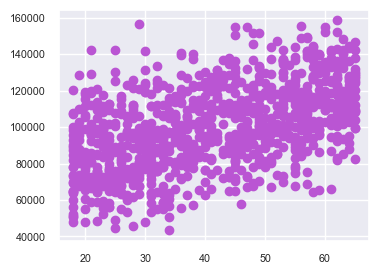

In [79]:
plt.rcParams["figure.figsize"] = (4,3)
plt.scatter(df2['Age'], df2['TotalPay'], c='mediumorchid')

In [82]:
df2['Age'].skew()

0.01315460552652177

In [87]:
X = df2[['Age']]
y = df2['TotalPay']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

X_train['TotalPay'] = y_train

sim_reg = ols('TotalPay ~ Age', data = X_train).fit()

pred_sim_reg = sim_reg.predict(X_test)


In [88]:
sim_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotalPay   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     267.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.89e-51
Time:                        08:54:12   Log-Likelihood:                -8226.2
No. Observations:                 727   AIC:                         1.646e+04
Df Residuals:                     725   BIC:                         1.647e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.498e+04   2292.757     28.339      0.000    6.05e+04    6.95e+04
Age          858.7323     52.483     16.362      0.000     755.696     961.769
==============================================================================
Omnibus:                        9.038   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                5.827
Skew:                           0.012   Prob(JB):                       0.0543
Kurtosis:                       2.562   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Observation: From the output of regresssion above it can be saying that there is a weak inverse relationship between Age and ToalPay. 
    The increase in age by 1 unit leads to a reduction in time by 858 days. The r2 indicates that the model explains 2.7 % of the variation in time variable.***